# Imports

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

import pickle

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import accuracy_score

In [2]:
resume = pd.read_csv("resume_cleaned.csv")

In [3]:
with open('tfidf.pickle', 'rb') as handle:
    vec = pickle.load(handle)
    X = pickle.load(handle)

y = resume['Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

In [5]:
print(X.shape)
print(y.shape)

(1206, 27842)
(1206,)


In [6]:
accuracy = []
labels = []


In [7]:
rfc_model = RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0)
accuracy_scores = cross_val_score(rfc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('RandomForrest')

[ 0.35820896  0.37121212  0.33858268  0.40322581  0.42857143  0.36440678
  0.44347826  0.43859649  0.38392857  0.36936937]
0.389958046118


In [8]:
mnb_model = MultinomialNB()
accuracy_scores = cross_val_score(mnb_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('NaiveBayes')

[ 0.40298507  0.42424242  0.43307087  0.41935484  0.50420168  0.38983051
  0.49565217  0.50877193  0.42857143  0.43243243]
0.443911335761


In [9]:
lgr_model = LogisticRegression(multi_class = 'auto', solver = 'lbfgs', random_state=0)
accuracy_scores = cross_val_score(lgr_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('LogisticRegression')

[ 0.63432836  0.59090909  0.5984252   0.62903226  0.69747899  0.53389831
  0.62608696  0.68421053  0.71428571  0.53153153]
0.624018692937


In [10]:
svc_model = LinearSVC()
accuracy_scores = cross_val_score(svc_model, X, y, scoring='accuracy', cv = 10, n_jobs = 4)

print(accuracy_scores)
print(np.mean(accuracy_scores))

for score in accuracy_scores:
    accuracy.append(score)
    labels.append('SupportVectorClassifier')

[ 0.76119403  0.73484848  0.7007874   0.75        0.76470588  0.61864407
  0.68695652  0.71929825  0.75        0.66666667]
0.715310130044


In [11]:
df = pd.DataFrame()
df['accuracy'] = accuracy
df['classifier'] = labels

Text(0.5, 0.98, 'Accuracy scores for different Classifier Models')

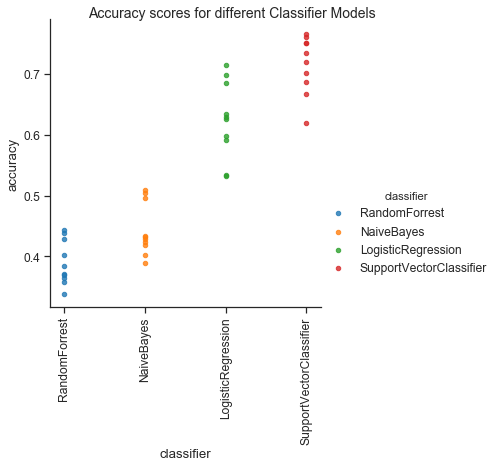

In [12]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Create scatterplot of dataframe
lm = sns.lmplot('classifier', # Horizontal axis
           'accuracy', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           hue="classifier", # Set color
           scatter_kws={"marker": "D", # Set marker style
                        "s": 20}) # S marker size

lm.set_xticklabels(rotation=90)
 
lm.fig.suptitle('Accuracy scores for different Classifier Models', fontsize=14)

## Support Vector Classifier is providing good accuracy range